### Overview

This notebook is related to the cousework of the course: Statistical Modeling in Financial Market

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data

In [2]:
data = {'Year':list(range(2000,2007)), 'Esprit':[8.4, 6.65, 8.8, 13.15, 25.85, 55.1, 87.05], 'HSBC':[108,115.5,91.25,85.25,122.5,124.4,142.5],
        'SHKP':[83.75, 77.75,63,46.2,64.25,75.75,89.4], 'HW':[105.91,97.25,75.25,48.8,57.25,73.9,79], 'CLP':[32.5,29.75,31.4,36.9,44.6,44.95,57.6]}
df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df

,Year,Esprit,HSBC,SHKP,HW,CLP
0,2000-01-01,8.40,108.00,83.75,105.91,32.50
1,2001-01-01,6.65,115.50,77.75,97.25,29.75
2,2002-01-01,8.80,91.25,63.00,75.25,31.40
3,2003-01-01,13.15,85.25,46.20,48.80,36.90
4,2004-01-01,25.85,122.50,64.25,57.25,44.60
5,2005-01-01,55.10,124.40,75.75,73.90,44.95
6,2006-01-01,87.05,142.50,89.40,79.00,57.60


### Q1) Calculate the annual covariance matrix and annual expected rates of returns of these stocks

In [3]:
# Calculate return for each stock in each year
stocks = df.iloc[:,1:]
for i in stocks.columns:
    new_col = i+'_r'
    stocks[new_col] = stocks[i].pct_change()
stocks

,Esprit,HSBC,SHKP,HW,CLP,Esprit_r,HSBC_r,SHKP_r,HW_r,CLP_r
0,8.40,108.00,83.75,105.91,32.50,NaN,NaN,NaN,NaN,NaN
1,6.65,115.50,77.75,97.25,29.75,-0.208333,0.069444,-0.071642,-0.081768,-0.084615
2,8.80,91.25,63.00,75.25,31.40,0.323308,-0.209957,-0.189711,-0.226221,0.055462
3,13.15,85.25,46.20,48.80,36.90,0.494318,-0.065753,-0.266667,-0.351495,0.175159
4,25.85,122.50,64.25,57.25,44.60,0.965779,0.436950,0.390693,0.173156,0.208672
5,55.10,124.40,75.75,73.90,44.95,1.131528,0.015510,0.178988,0.290830,0.007848
6,87.05,142.50,89.40,79.00,57.60,0.579855,0.145498,0.180198,0.069012,0.281424


In [4]:
# Calculate mean annual return for each stock
stocks.describe()

,Esprit,HSBC,SHKP,HW,CLP,Esprit_r,HSBC_r,SHKP_r,HW_r,CLP_r
count,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,29.285714,112.771429,71.442857,76.765714,39.671429,0.547743,0.065282,0.036977,-0.021081,0.107325
std,30.668954,19.851403,14.676950,20.196705,9.996243,0.477801,0.219086,0.253448,0.244160,0.137557
min,6.650000,85.250000,46.200000,48.800000,29.750000,-0.208333,-0.209957,-0.266667,-0.351495,-0.084615
25%,8.600000,99.625000,63.625000,65.575000,31.950000,0.366061,-0.045438,-0.160193,-0.190108,0.019751
50%,13.150000,115.500000,75.750000,75.250000,36.900000,0.537086,0.042477,0.053673,-0.006378,0.115311
75%,40.475000,123.450000,80.750000,88.125000,44.775000,0.869298,0.126485,0.179896,0.147120,0.200294
max,87.050000,142.500000,89.400000,105.910000,57.600000,1.131528,0.436950,0.390693,0.290830,0.281424


In [5]:
# Calculate the annual covariance matrix
rtn = stocks.iloc[:, 5:]
rtn = rtn.dropna()
rtn.cov()

,Esprit_r,HSBC_r,SHKP_r,HW_r,CLP_r
Esprit_r,0.228293,0.038903,0.076918,0.075151,0.028604
HSBC_r,0.038903,0.047999,0.047523,0.032680,0.012234
SHKP_r,0.076918,0.047523,0.064236,0.055865,0.011733
HW_r,0.075151,0.032680,0.055865,0.059614,0.000843
CLP_r,0.028604,0.012234,0.011733,0.000843,0.018922


### Q2) Using annual expected return of SHKP and HSBC to calculate and plot the efficient frontier

In [6]:
sd_shk = rtn['SHKP_r'].std()
sd_hsbc = rtn['HSBC_r'].std()
m_shk = rtn['SHKP_r'].mean()
m_hsbc = rtn['HSBC_r'].mean()
cov = rtn['SHKP_r'].cov(rtn['HSBC_r'])
record = {'SHKP Weight':[], 'HSBC Weight':[], 'Portfolio Expected Return':[], 'Portfolio Standard Deviation':[]}
for a in np.linspace(-1,1,21):
    b = 1-a
    exp_r = a*m_shk + b*m_hsbc
    std = ((a*sd_shk)**2 + (b*sd_hsbc)**2 + 2*a*b*cov)**0.5
    record['SHKP Weight'].append(a)
    record['HSBC Weight'].append(b)
    record['Portfolio Expected Return'].append(exp_r)
    record['Portfolio Standard Deviation'].append(std)
result = pd.DataFrame(record)
result
    

,SHKP Weight,HSBC Weight,Portfolio Expected Return,Portfolio Standard Deviation
0,-1.0,2.0,0.093588,0.257174
1,-0.9,1.9,0.090757,0.250555
2,-0.8,1.8,0.087927,0.244460
3,-0.7,1.7,0.085096,0.238929
4,-0.6,1.6,0.082265,0.234003
5,-0.5,1.5,0.079435,0.229720
6,-0.4,1.4,0.076604,0.226118
7,-0.3,1.3,0.073774,0.223229
8,-0.2,1.2,0.070943,0.221080
9,-0.1,1.1,0.068113,0.219694


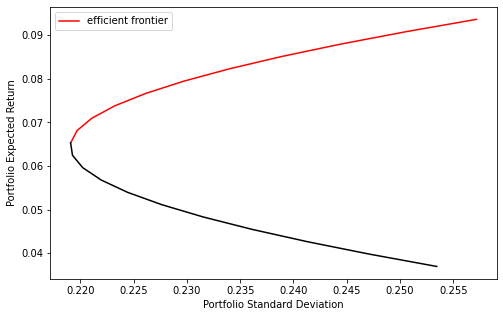

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(result['Portfolio Standard Deviation'][:11], result['Portfolio Expected Return'][:11], color='r', label = 'efficient frontier')
ax.plot(result['Portfolio Standard Deviation'][10:], result['Portfolio Expected Return'][10:], color='black')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.legend()

### Q3) Assume the listed stocks in data form the narket portfolio. Calculate the efficient market weights W1, W2 of the two efficient portfolios with short-selling. Using the two-fund theorem, determine the expected return and volatility of the efficient market portfolio (0.5W1 + 0.5W2)

Refer to Markowitz Model, W1 is obtained by setting lambda 1 = 0 and lambda 2 = 1 and solving the following equations. W2 is obtained by setting lambda 1 = 1 and lambda 2 = 0 and solving the equations.

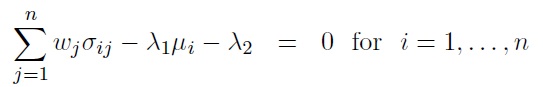

In [8]:
cov_matrix = rtn.cov().values
w1 = np.linalg.inv(cov_matrix).dot(np.array([[1],[1],[1],[1],[1]]))
w1 = w1/w1.sum()
w1

array([[-0.09279013],
       [ 0.51147689],
       [-1.38511612],
       [ 1.17814943],
       [ 0.78827993]])

In [9]:
w2 = np.linalg.inv(cov_matrix).dot(np.array([[0.547743],[0.065282],[0.036977],[-0.021081],[0.107325]]))
w2 = w2/w2.sum()
w2

array([[-2.01504553],
       [-2.68700258],
       [ 1.82050148],
       [ 2.41625484],
       [ 1.4652918 ]])

In [10]:
# Applying two fund theorm to obtain efficient portfolio
w3 = 0.5*w1+0.5*w2
w3

array([[-1.05391783],
       [-1.08776285],
       [ 0.21769268],
       [ 1.79720213],
       [ 1.12678586]])

In [11]:
expected_return = w3.flatten().dot(np.array([0.547743,0.065282,0.036977,-0.021081,0.107325]))
print("expected return =", expected_return)

expected return = -0.557192350543312


In [12]:
variance = w3.T.dot(cov_matrix).dot(w3)
print('variance = ', variance)

variance =  [[0.10387829]]


### Q4) Plot the efficient frontier of the market portfolio in Q3 with short-selling. Suppose risk-free rate is 5%, determine efficient frontier when lending and borrowing of the risk-free asset is allowed.

In [13]:
res = {'W1 weight':[], 'W2 weight':[], 'Portfolio Expected Return': [], 'Portfolio Standard Deviation':[]}
means = np.array([0.547743,0.065282,0.036977,-0.021081,0.107325]) # mean annual return of each stocks
for a in np.linspace(-1,3,121): 
    b = 1-a
    w3 = a*w1 + b*w2
    p_mean = w3.flatten().dot(means)
    p_sd = (w3.T.dot(cov_matrix).dot(w3)[0][0])**0.5
    res['W1 weight'].append(a)
    res['W2 weight'].append(b)
    res['Portfolio Expected Return'].append(p_mean)
    res['Portfolio Standard Deviation'].append(p_sd)
df_res = pd.DataFrame(res)
df_res

,W1 weight,W2 weight,Portfolio Expected Return,Portfolio Standard Deviation
0,-1.000000,2.000000,-2.202109,1.270090
1,-0.966667,1.966667,-2.165555,1.248965
2,-0.933333,1.933333,-2.129002,1.227841
3,-0.900000,1.900000,-2.092448,1.206718
4,-0.866667,1.866667,-2.055894,1.185595
...,...,...,...,...
116,2.866667,-1.866667,2.038121,1.185595
117,2.900000,-1.900000,2.074674,1.206718
118,2.933333,-1.933333,2.111228,1.227841
119,2.966667,-1.966667,2.147782,1.248965


Text(0.5, 1.0, 'Efficient Frontier of Market Portfolio')

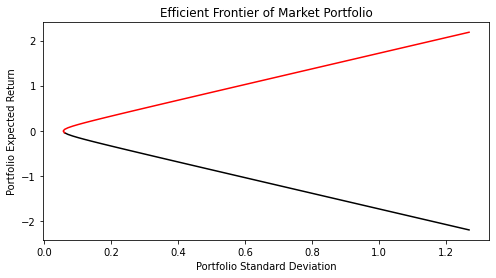

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df_res['Portfolio Standard Deviation'][:60], df_res['Portfolio Expected Return'][:60], color='black')
ax.plot(df_res['Portfolio Standard Deviation'][59:], df_res['Portfolio Expected Return'][59:], color='r')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.title('Efficient Frontier of Market Portfolio')

##### when lending and borrowing of the risk-free asset is allowed
Tangency portfolio can be found by solving the following equations



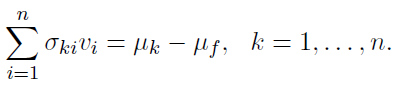

In [15]:
# Find the tangency portfolio
means = np.array([[0.547743],[0.065282],[0.036977],[-0.021081],[0.107325]])
d_means = means - 0.05
w_opt = np.linalg.inv(cov_matrix).dot(d_means)
w_opt = w_opt/w_opt.sum()
w_opt

array([[-0.38288322],
       [ 0.02878515],
       [-0.90134715],
       [ 1.36499548],
       [ 0.89044974]])

In [16]:
# mean of tangency portfolio
mean_opt = w_opt.flatten().dot(means)[0]
mean_opt

-0.17437951802493606

In [17]:
sd_opt = (w_opt.T.dot(cov_matrix).dot(w_opt)[0][0])**0.5
sd_opt

0.11147913446353008

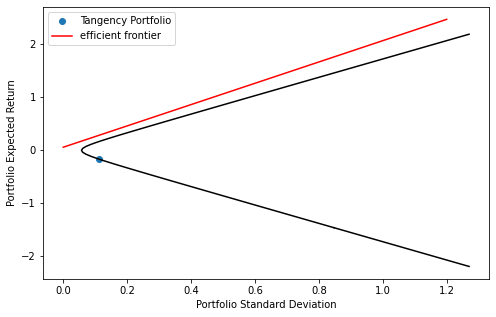

In [18]:
# Efficient frontier is obtained by short-selling unique risky fund and buying risk-free asset 
x = np.linspace(0,1.2,100)
y = (x*(-mean_opt+0.05)/sd_opt+0.05)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(df_res['Portfolio Standard Deviation'][:21], df_res['Portfolio Expected Return'][:21], color='black')
ax.plot(df_res['Portfolio Standard Deviation'][20:], df_res['Portfolio Expected Return'][20:], color='black')
ax.scatter([sd_opt],[mean_opt], label='Tangency Portfolio')
ax.plot(x,y, color='r', label = 'efficient frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')

plt.legend()